## Question Desciption

Write a program to plot **wave propagation showing diffraction at an aperture**. Use Huygens-Fresnel construction. Wavefronts at selected moments in time need not be explicitly labelled.

## Answer

In [1]:
# import libs
import numpy as np
from matplotlib.patches import Wedge, Rectangle, Arc
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [2]:
# init the plot attributions
def plot_init(show_axis=True):
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_color('none')

    plt.axhline(0, color='black')
    # plt.axvline(0, color='black', linestyle='--')

    plt.xlim(-4.0, 4.0)
    plt.ylim(-4.0, 4.0)

    # Turn off ticks
    if show_axis:
        ax.set_yticks([])
        ax.set_xticks([])

In [3]:
# Draw the top incident of diffraction
def plot_top_incident(width):
    for i in np.linspace(0, 3, 8):
        if i == 0: continue
        plt.plot([-width / 2, width / 2], [i, i], color='#204a87', linewidth=3)

    ax.arrow(0, 4, 0, -3, head_width=0.1, color='#204a87', linestyle='--', linewidth=3)

In [4]:
# Draw two blocks with Rectangle of patches
def plot_block():
    rect1 = Rectangle((-4, 0), 2.5, 0.3, fill=True, color='#5c6163')
    rect2 = Rectangle((1.5, 0), 2.5, 0.3, fill=True, color='#5c6163')
    p = PatchCollection([rect1, rect2], match_original=True)
    ax.add_collection(p)

In [5]:
# Draw the scatter of the diffraction from -1.5 to 1.5
def plot_scatter():
    scatter = []
    for i in np.linspace(-1.5, 1.5, 6):
        scatter.append(i)
        ax.scatter(i, 0, color='#edd400', zorder=5, s=200)
    return scatter

In [6]:
# Draw the bottom incident of wave
def plot_bottom_incident(scatter, r=0.4, num=6):
    patches = []

    for i in scatter:
        for j in range(num):
            # draw the wedge from angle 180 to 160, and set alpha with different position
            wedge = Wedge((i, 0), r * j, 180, 360, color='gray', fill=False, alpha=0.1 * j, linewidth=2)
            patches.append(wedge)

    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)

    plot_round_rect(scatter, (num - 1) * r)

    # draw the direction arrow
    plot_direction_arrow(scatter, (num - 1) * r)


In [7]:
# Draw the new incident after diffraction(the green part)
def plot_round_rect(scatter, r):
    plot_singer_round_rect(scatter, r * 2 + 0.2)
    plot_singer_round_rect(scatter, r * 2 + 0.8)


def plot_singer_round_rect(scatter, radius):
    ax.add_patch(Arc((scatter[0], 0), radius, radius, theta1=180, theta2=270, edgecolor='#4e9a06', lw=3))
    plt.plot([scatter[0], scatter[-1]], [-radius/2, -radius/2], linewidth=3, color='#4e9a06')
    ax.add_patch(Arc((scatter[-1], 0), radius, radius, theta1=270, theta2=360, edgecolor='#4e9a06', lw=3))


def plot_direction_arrow(scatter, r):
    ax.arrow(scatter[0] - 1/2, -1/2, -3/2, -3/2, head_width=0.1, color='#4e9a06', linestyle='--', linewidth=3)
    ax.arrow(0, -1/2, 0, -2, head_width=0.1, color='#4e9a06', linestyle='--', linewidth=3)
    ax.arrow(scatter[-1] + 1/2, -1/2, +3/2, -3/2, head_width=0.1, color='#4e9a06', linestyle='--', linewidth=3)


In [8]:
# Split the Diffraction part into different parts for drawing
def plot_diffraction(width=6):
    # plot the top incident and arrow
    plot_top_incident(width)

    # draw the rectangle block
    plot_block()

    # draw the scatter points
    scatter = plot_scatter()

    # draw the bottom incident
    plot_bottom_incident(scatter)

    plt.title('Plot of wave Diffraction based on Huygens-Fresnel Construction', fontsize=20)
    plt.savefig('Q1_Diffraction')
    plt.show()

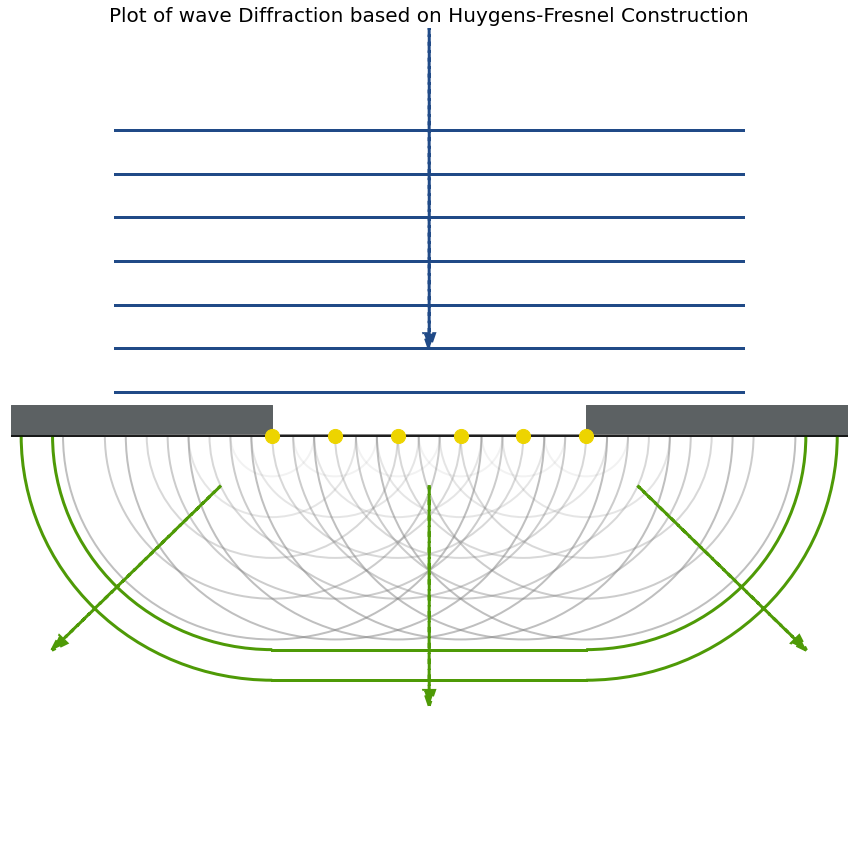

In [9]:
if __name__ == '__main__':
    fig, ax = plt.subplots(figsize=(15, 15))
    plot_init(show_axis=True)

    plot_diffraction()